In [7]:
import numpy as np
import matplotlib.pyplot as plt

from seml.database import get_collection

In [8]:
collection = get_collection('mnist-mlp-1')

In [9]:
fields = ['config', 'info']
query = {} # pull all experiments
results = list(collection.find(query, fields))

In [10]:
train_points = results[0]['config']['train_points']
initialization_scale = results[0]['config']['initialization_scale']
weight_decays = sorted(list({r['config']['weight_decay'] for r in results}))

[None, None]

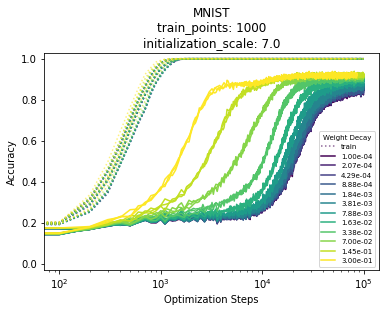

In [33]:
colors = plt.cm.viridis(np.linspace(0, 1, len(weight_decays)))
for i, weight_decay in enumerate(weight_decays):
    fields = ['config', 'info']
    query = {
        'config.weight_decay': weight_decay
    }
    results = list(collection.find(query, fields))
    if results:
        for j, r in enumerate(results):
            if r['info']:
                
                steps = r['info']['log_steps']
                train = r['info']['train']['accuracy']
                val = r['info']['val']['accuracy']
    #             plt.plot(steps, train, color='red')
                plt.plot(steps, train[:len(steps)], color=colors[i], alpha=0.6, linestyle='dotted', label='train' if i == 0 and j == 0 else None)
                plt.plot(steps, val, color=colors[i], label="{:1.2e}".format(weight_decay) if j == 0 else None)

        
plt.xscale('log')
plt.xlabel("Optimization Steps")

plt.ylim(-0.03, 1.03)
plt.ylabel("Accuracy")

plt.title(f"MNIST\ntrain_points: {train_points}\ninitialization_scale: {initialization_scale}")
legend = plt.legend(prop={'size': 7}, loc='lower right', title="Weight Decay")
plt.setp(legend.get_title(), fontsize=7)


# Varying initialization_scale

In [34]:
collection = get_collection('mnist-mlp-2')

In [35]:
fields = ['config', 'info']
query = {'status': 'COMPLETED'} # pull all experiments
results = list(collection.find(query, fields))

In [37]:
train_points = results[0]['config']['train_points']
initialization_scale = results[0]['config']['initialization_scale']
weight_decays = sorted(list({r['config']['weight_decay'] for r in results}))
initialization_scales = sorted(list({r['config']['initialization_scale'] for r in results}))

In [38]:
initialization_scales

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]

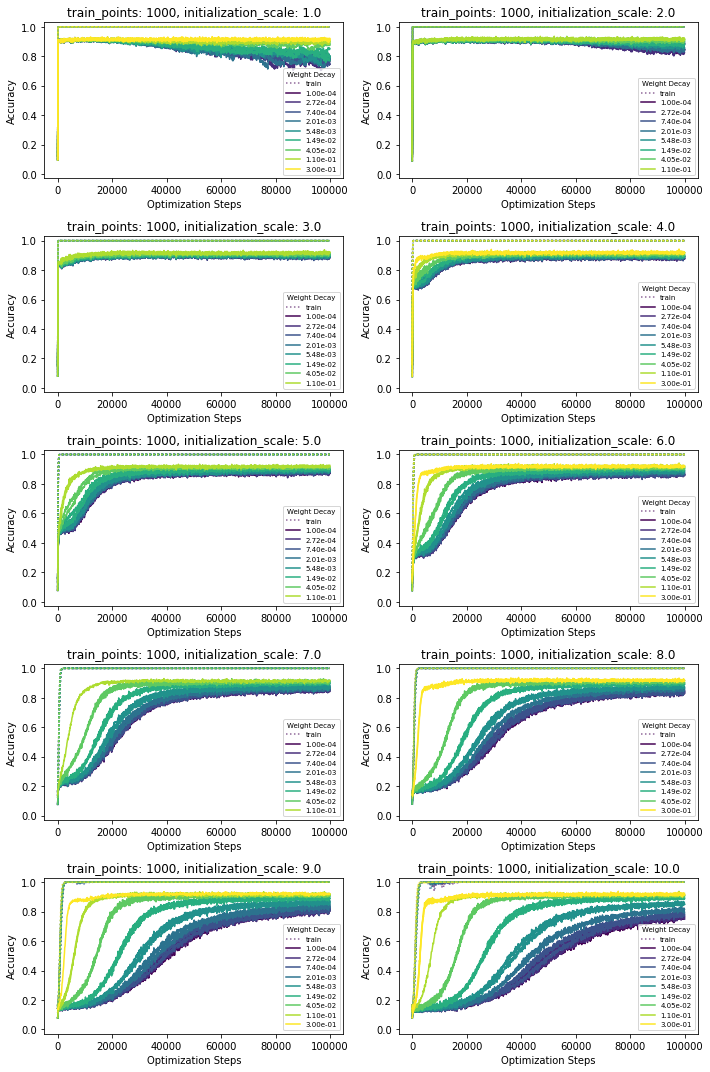

In [47]:
plt.figure(figsize=(10, 15))

for l, scale in enumerate(initialization_scales):
    
    plt.subplot(5, 2, l+1)
    
    colors = plt.cm.viridis(np.linspace(0, 1, len(weight_decays)))
    for i, weight_decay in enumerate(weight_decays):
        fields = ['config', 'info']
        query = {
            'status': 'COMPLETED',
            'config.weight_decay': weight_decay,
            'config.initialization_scale': scale
            
        }
        results = list(collection.find(query, fields))
        if results:
            for j, r in enumerate(results):
                if r['info']:

                    steps = r['info']['log_steps']
                    train = r['info']['train']['accuracy']
                    val = r['info']['val']['accuracy']
        #             plt.plot(steps, train, color='red')
                    plt.plot(steps, train[:len(steps)], color=colors[i], alpha=0.6, linestyle='dotted', label='train' if i == 0 and j == 0 else None)
                    plt.plot(steps, val, color=colors[i], label="{:1.2e}".format(weight_decay) if j == 0 else None)


#     plt.xscale('log')
    plt.xlabel("Optimization Steps")

    plt.ylim(-0.03, 1.03)
    plt.ylabel("Accuracy")

    plt.title(f"train_points: {train_points}, initialization_scale: {scale}")
    legend = plt.legend(prop={'size': 7}, loc='lower right', title="Weight Decay")
    plt.setp(legend.get_title(), fontsize=7)

plt.tight_layout()
plt.savefig('figures/different-initialization-scales.pdf')


# varying train_data

In [101]:
collection = get_collection('mnist-mlp-3')

In [102]:
fields = ['config']
query = {} # pull all experiments
results = list(collection.find(query, fields))

In [103]:
initialization_scale = results[0]['config']['initialization_scale']
weight_decays = sorted(list({r['config']['weight_decay'] for r in results}))
train_pointses = sorted(list({r['config']['train_points'] for r in results}))

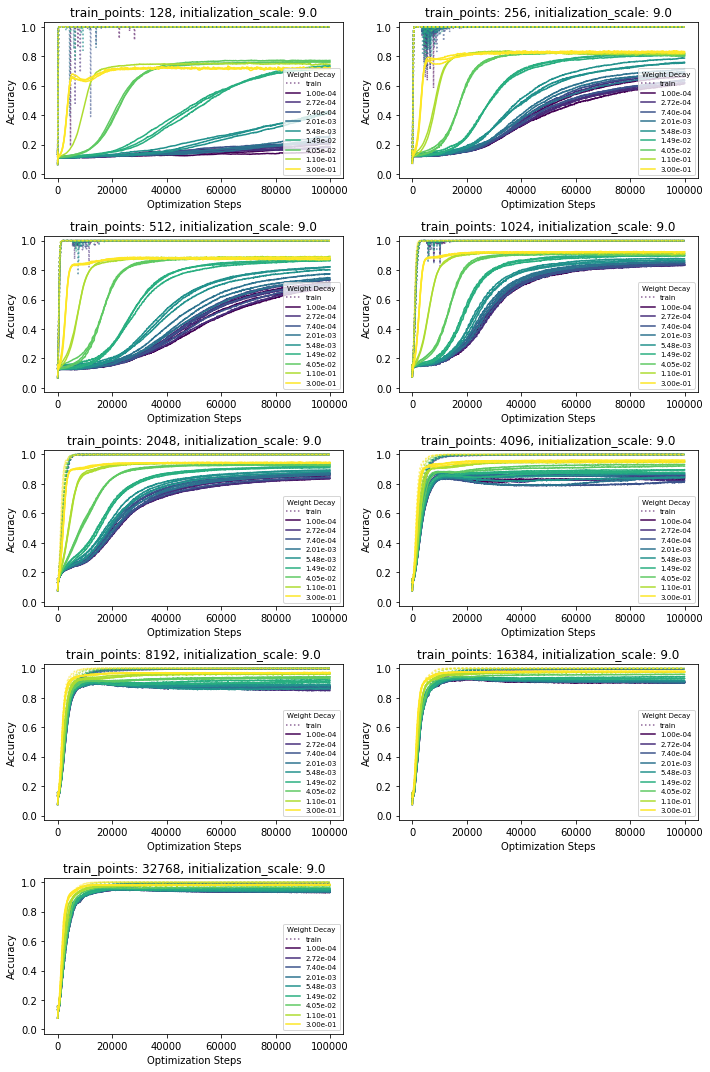

In [104]:
plt.figure(figsize=(10, 15))

for l, train_points in enumerate(train_pointses):
    
    plt.subplot(5, 2, l+1)
    
    colors = plt.cm.viridis(np.linspace(0, 1, len(weight_decays)))
    for i, weight_decay in enumerate(weight_decays):
        fields = ['config', 'info']
        query = {
            'status': 'COMPLETED',
            'config.weight_decay': weight_decay,
            'config.train_points': train_points
            
        }
        results = list(collection.find(query, fields))
        if results:
            for j, r in enumerate(results):
                if r['info']:

                    steps = r['info']['log_steps']
                    train = r['info']['train']['accuracy']
                    val = r['info']['val']['accuracy']
        #             plt.plot(steps, train, color='red')
                    plt.plot(steps, train[:len(steps)], color=colors[i], alpha=0.6, linestyle='dotted', label='train' if i == 0 and j == 0 else None)
                    plt.plot(steps, val, color=colors[i], label="{:1.2e}".format(weight_decay) if j == 0 else None)


#     plt.xscale('log')
    plt.xlabel("Optimization Steps")

    plt.ylim(-0.03, 1.03)
    plt.ylabel("Accuracy")

    plt.title(f"train_points: {train_points}, initialization_scale: {initialization_scale}")
    legend = plt.legend(prop={'size': 7}, loc='lower right', title="Weight Decay")
    plt.setp(legend.get_title(), fontsize=7)

plt.tight_layout()
plt.savefig('figures/different-train-points.pdf')


# more data, varying initialization_scale

In [122]:
collection = get_collection('mnist-mlp-4')

In [123]:
fields = ['config', 'info']
query = {'status': 'COMPLETED'} # pull all experiments
results = list(collection.find(query, fields))

In [124]:
train_points = results[0]['config']['train_points']
initialization_scale = results[0]['config']['initialization_scale']
weight_decays = sorted(list({r['config']['weight_decay'] for r in results}))
initialization_scales = sorted(list({r['config']['initialization_scale'] for r in results}))

In [125]:
initialization_scales

[1.0,
 3.0714285714285716,
 5.142857142857143,
 7.214285714285715,
 9.285714285714286,
 11.357142857142858,
 13.42857142857143,
 15.500000000000002,
 17.571428571428573,
 19.642857142857146,
 21.714285714285715,
 23.78571428571429,
 25.85714285714286,
 27.92857142857143,
 30.0]

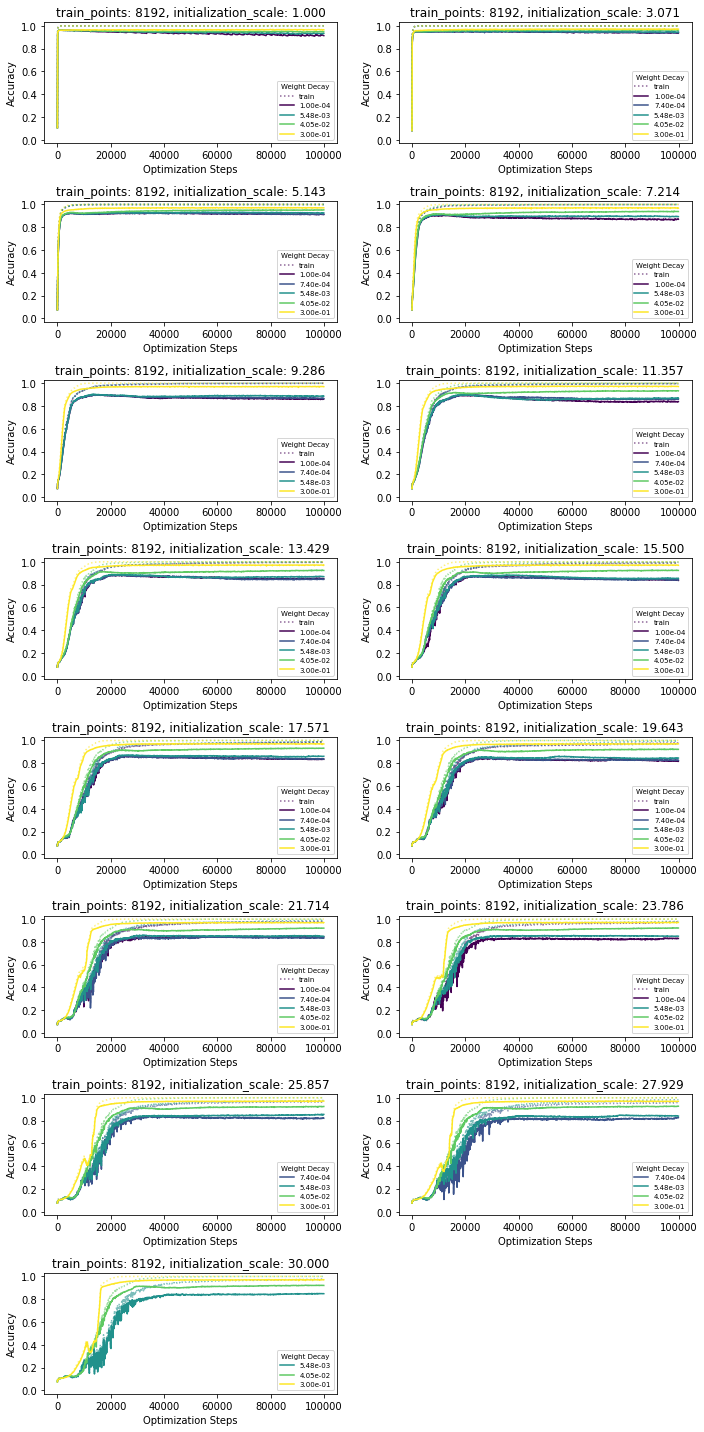

In [126]:
plt.figure(figsize=(10, 20))

for l, scale in enumerate(initialization_scales):
    
    plt.subplot(8, 2, l+1)
    
    colors = plt.cm.viridis(np.linspace(0, 1, len(weight_decays)))
    for i, weight_decay in enumerate(weight_decays):
        fields = ['config', 'info']
        query = {
            'status': 'COMPLETED',
            'config.weight_decay': weight_decay,
            'config.initialization_scale': scale
            
        }
        results = list(collection.find(query, fields))
        if results:
            for j, r in enumerate(results):
                if r['info']:

                    steps = r['info']['log_steps']
                    train = r['info']['train']['accuracy']
                    val = r['info']['val']['accuracy']
        #             plt.plot(steps, train, color='red')
                    plt.plot(steps, train[:len(steps)], color=colors[i], alpha=0.6, linestyle='dotted', label='train' if i == 0 and j == 0 else None)
                    plt.plot(steps, val, color=colors[i], label="{:1.2e}".format(weight_decay) if j == 0 else None)


#     plt.xscale('log')
    plt.xlabel("Optimization Steps")

    plt.ylim(-0.03, 1.03)
    plt.ylabel("Accuracy")

    plt.title(f"train_points: {train_points}, initialization_scale: {scale:.3f}")
    legend = plt.legend(prop={'size': 7}, loc='lower right', title="Weight Decay")
    plt.setp(legend.get_title(), fontsize=7)

plt.tight_layout()
plt.savefig('figures/different-initialization-scales-more-data.pdf')


In [48]:
results[0]['config']

{'train_points': 1000,
 'optimization_steps': 100000,
 'batch_size': 200,
 'loss_function': 'MSE',
 'optimizer': 'AdamW',
 'weight_decay': 0.29999999999999993,
 'lr': 0.001,
 'initialization_scale': 10.0,
 'download_directory': 'om/user/ericjm/Downloads/',
 'depth': 3,
 'width': 200,
 'activation': 'ReLU',
 'log_freq': 100,
 'verbose': False,
 'device': {'py/reduce': [{'py/type': 'torch.device'},
   {'py/tuple': ['cuda', 0]}]},
 'dtype': {'py/object': 'torch.dtype'},
 'overwrite': 268,
 'db_collection': 'mnist-mlp-2',
 'seed': 0}

In [ ]:
fracs = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
colors = plt.cm.viridis(np.linspace(0, 1, len(fracs)))
for i, frac in enumerate(fracs):
    fields = ['config', 'info']
    query = {
#         'status': 'RUNNING',
        'config.training_data_fraction': frac,
    }
    results = list(collection.find(query, fields))
    if results:
        for j, r in enumerate(results):
            steps = r['info']['log_steps']
            train = r['info']['/']['train']['accuracy']
            val = r['info']['/']['val']['accuracy']

#             plt.plot(steps, train, color='red')
            plt.plot(steps, val, color=colors[i], label=frac if j == 0 else None)
plt.legend()

ax = plt.subplot(1, 1, 1)

fracs = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
colors = plt.cm.viridis(np.linspace(0, 1, len(fracs)))
for i, frac in tqdm(enumerate(fracs)):
    fields = ['config', 'info']
    query = {
#         'status': 'RUNNING',
        'config.training_data_fraction': frac,
    }
    results = list(collection.find(query, fields))
    results = [r for r in results if r['info']['log_steps'][-1] > 200000]
    if results:
        shortest_run = min(range(len(results)), key=lambda k: len(results[k]['info']['log_steps']))
        l = len(results[shortest_run]['info']['log_steps'])
        steps = results[shortest_run]['info']['log_steps']
        trains = np.array([results[k]['info']['/']['train']['accuracy'][:l] for k in range(len(results))])
        vals = np.array([results[k]['info']['/']['val']['accuracy'][:l] for k in range(len(results))])
        train_means = np.mean(trains, axis=0)
        train_stds = np.std(trains, axis=0)
        val_means = np.mean(vals, axis=0)
        val_stds = np.std(vals, axis=0)
        
        
        
#         steps = []
#         train_means = []
#         train_stds = []
#         val_means = []
#         val_stds = []
#         j = 0
        
        
        
#         while all(len(results[k]['info']['log_steps']) > j for k in range(len(results))):
#             steps.append(j)
#             train_means.append(np.mean([results[k]['info']['/']['train']['accuracy'][j] for k in range(len(results))]))
#             train_stds.append(np.std([results[k]['info']['/']['train']['accuracy'][j] for k in range(len(results))]))
#             val_means.append(np.mean([results[k]['info']['/']['val']['accuracy'][j] for k in range(len(results))]))
#             val_stds.append(np.std([results[k]['info']['/']['val']['accuracy'][j] for k in range(len(results))]))
        
#         train_means = np.array(train_means)
#         train_stds = np.array(train_stds)
#         val_means = np.array(val_means)
#         val_stds = np.array(val_stds)
        plt.plot(steps, val_means, color=colors[i], label=frac)
        plt.fill_between(steps, val_means-val_stds, val_means+val_stds, color=colors[i], alpha=0.3)

plt.ylim(-0.02, 1.05)
plt.xlim(100, 1000000)
plt.xscale('log')
# ax.ticklabel_format(axis='x', style='scientific')
legend = plt.legend(prop={'size': 9}, loc='upper left', title="train data\nfraction")
plt.setp(legend.get_title(), fontsize='9')




In [ ]:
with open("../results/2/info.json", 'r') as f:
    info = json.load(f)
with open("../results/2/config.json", 'r') as f:
    config = json.load(f)

In [ ]:
steps = info['log_steps']
train_accuracies = info['train']['accuracy']
val_accuracies = info['val']['accuracy']

plt.plot(steps, train_accuracies, color='red', label='train')
plt.plot(steps, val_accuracies, color='green', label='val')
plt.xlabel("Optimization Steps")
plt.ylabel("Accuracy")
plt.title(f"MNIST:\ntrain_points: {config['train_points']}\ninitialization_scale: {config['initialization_scale']}\nweight_decay: {config['weight_decay']}")

plt.legend()